In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
%matplotlib inline

In [37]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 'Unnamed: 0')

/Users/jacksongilkey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [39]:
df.columns
df['_STATE'].describe()

count    34545.000000
mean        27.046693
std         12.026461
min          9.000000
25%          9.000000
50%         34.000000
75%         36.000000
max         36.000000
Name: _STATE, dtype: float64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [40]:
df[df['_STATE'].isin([9,34, 36])]


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Now check to see how large our subset df.

In [41]:
df.shape
df['_STATE'].unique()

array([ 9., 34., 36.])

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [42]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [47]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

df.dropna(subset=['PHYSHLTH'], inplace=True)

df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [48]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

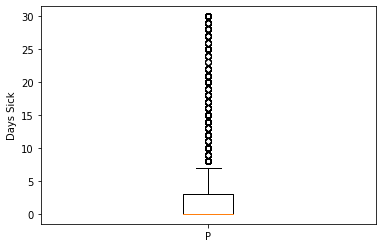

In [49]:
fig, ax = plt.subplots()
ax.boxplot(df['PHYSHLTH'])
ax.set_xticklabels('PHYSHLTH')
ax.set_ylabel("Days Sick")

plt.show()

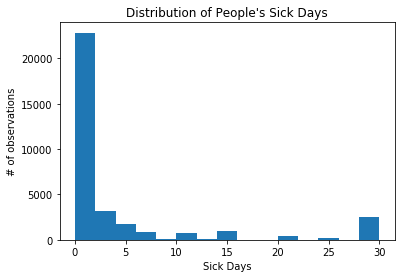

In [50]:
fig, ax = plt.subplots()
ax.hist(df['PHYSHLTH'], bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [51]:
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [52]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

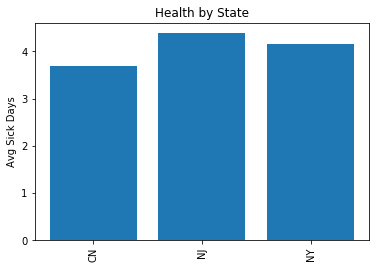

In [53]:
fig, ax = plt.subplots()

ax.bar(states, means)

ax.set_xticklabels(['CN', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("Avg Sick Days")
ax.set_title('Health by State')

plt.show()

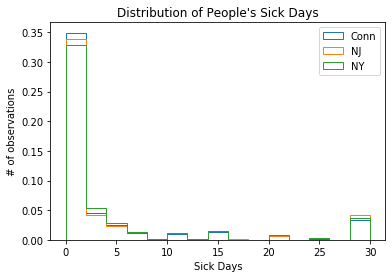

In [54]:
fig, ax = plt.subplots()

ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [55]:
df['CHRONIC'] = np.where(df['PHYSHLTH']>=20, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [57]:
sick_means = df.groupby('_STATE')['CHRONIC'].mean().values

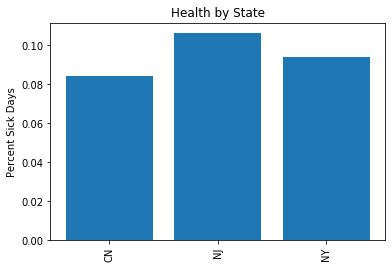

In [73]:
fig, ax = plt.subplots()

ax.bar(states, sick_means)

ax.set_xticklabels(['CN', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("Percent Sick Days")
ax.set_title('Health by State')


plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [59]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [60]:
df['SMOKDAY2'].value_counts().sum()

13468

In [68]:
df['smoking_status'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])
df['smoking_status'] = np.where(df['SMOKE100']==7, 7, df['smoking_status'])
df['smoking_status'] = np.where(df['SMOKE100']==9, 9, df['smoking_status'])
df['smoking_status'].describe()


count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking_status, dtype: float64

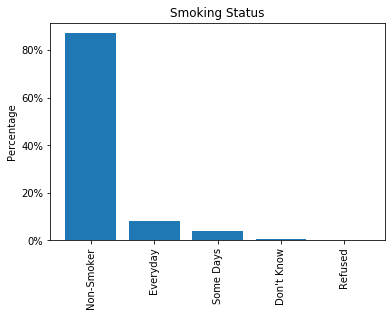

In [74]:
smoking_average = df['smoking_status'].value_counts()/df['smoking_status'].count()
fig, ax = plt.subplots()

ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_average)

ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percentage")
ax.set_title('Smoking Status')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()

In [83]:
df_cn = df.copy(deep=True)['_STATE' == 9]
df_nj = df.copy(deep=True)['_STATE' == 34]
df_ny = df.copy(deep=True)['_STATE' == 36]

KeyError: False

In [84]:
df.groupby(['_STATE', 'smoking_status'])['smoking_status'].count()


state_smoking = df.groupby(['_STATE', 'smoking_status']).agg({'smoking_status': 'count'})
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  